# **Installing Required Libraries**

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn


# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# **Load Dataset**

In [ ]:
import kagglehub
path = kagglehub.dataset_download("praveengovi/emotions-dataset-for-nlp")
print("Path to dataset files:", path)

100%|██████████| 721k/721k [00:00<00:00, 1.13MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/praveengovi/emotions-dataset-for-nlp/versions/1


# **Contents of the dataset folder**

In [ ]:
import os


os.listdir(path)

['val.txt', 'train.txt', 'test.txt']

# **Load the train/val/test files**

In [ ]:
train_df = pd.read_csv(f"{path}/train.txt", sep=';', header=None, names=['Text', 'Emotion'])
val_df = pd.read_csv(f"{path}/val.txt", sep=';', header=None, names=['Text', 'Emotion'])
test_df = pd.read_csv(f"{path}/test.txt", sep=';', header=None, names=['Text', 'Emotion'])

In [ ]:
df = pd.concat([train_df, val_df], ignore_index=True)
print(df.head())

                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


# **Emotion Distribution Visualization**

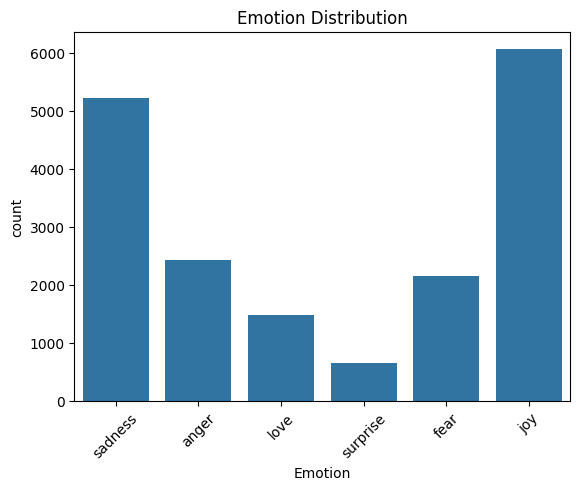

In [ ]:
sns.countplot(x='Emotion', data=df)
plt.xticks(rotation=45)
plt.title("Emotion Distribution")
plt.show()


# **Splitting Train - Test data**

In [ ]:
X = df['Text']
y = df['Emotion']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# **Training**

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_val_vec)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       anger       0.91      0.79      0.85       462
        fear       0.85      0.73      0.79       415
         joy       0.80      0.96      0.87      1176
        love       0.86      0.62      0.72       318
     sadness       0.89      0.93      0.91      1092
    surprise       0.88      0.50      0.64       137

    accuracy                           0.85      3600
   macro avg       0.87      0.75      0.80      3600
weighted avg       0.86      0.85      0.85      3600



# **Confusion Matrix of Train data**

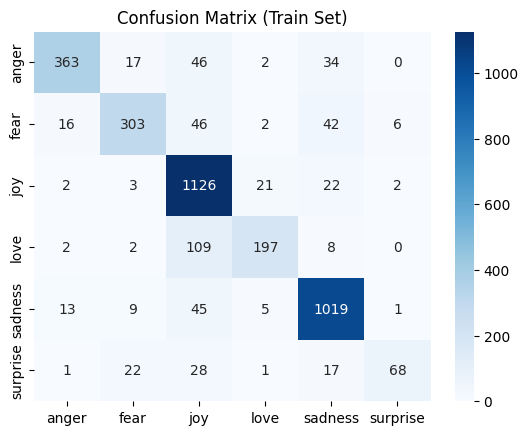

In [ ]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues", fmt='d')
plt.title("Confusion Matrix (Train Set)")
plt.show()

# **Testing**

In [ ]:
X_test = test_df['Text']
y_test = test_df['Emotion']

In [ ]:
X_test_vec = vectorizer.transform(X_test)

In [ ]:
y_test_pred = model.predict(X_test_vec)

In [ ]:
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

       anger       0.90      0.81      0.85       275
        fear       0.89      0.76      0.82       224
         joy       0.82      0.96      0.89       695
        love       0.83      0.58      0.69       159
     sadness       0.90      0.93      0.91       581
    surprise       0.83      0.44      0.57        66

    accuracy                           0.86      2000
   macro avg       0.86      0.75      0.79      2000
weighted avg       0.86      0.86      0.86      2000



# **Confusion Matrix of Test data**

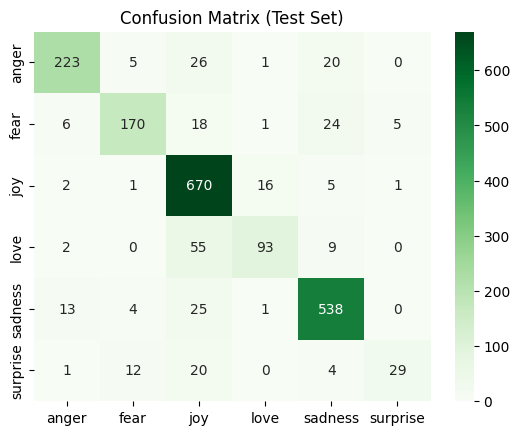

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, xticklabels=model.classes_, yticklabels=model.classes_, cmap="Greens", fmt='d')
plt.title("Confusion Matrix (Test Set)")
plt.show()

# **Downloading and Importing**

In [ ]:
import joblib

joblib.dump(model, 'emotion_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
from google.colab import files
files.download('emotion_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>